In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# substrate
n1=60
n2=60
a_sub=0.42
v1 = [a_sub,0]
v2 = [(a_sub/2),(np.sqrt(3)*(a_sub/2))]
ori=[0,0]
pt_index = np.array(np.meshgrid(np.arange(-n1,n1),np.arange(-n2,n2)))
x= pt_index[0,:,:]* v1[0]+ pt_index[1,:,:]* v2[0]+ori[0]
y= pt_index[0,:,:]* v1[1]+ pt_index[1,:,:]* v2[1]+ori[1]
z=np.ones_like(x)
mask_x = np.logical_and(x > 0, x < 18)
mask_y = np.logical_and(y > 0, y < 18)
mask_z = ~np.logical_and(mask_x,mask_y)
z_masked=np.ma.masked_array(z, mask_z)

In [6]:
# island
n1=100
n2=100
a_i=0.336
#a_i=0.36987944995633373
iv1_ini = [a_i,0 ]
iv2_ini = [a_i/2,np.sqrt(3)*(a_i/2)]
iori=[0,0]
iori2_ini=[a_i/2,(a_i/(2*np.sqrt(3)))]

In [7]:
rot=0
theta = np.radians(rot)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
iv1=R.dot(iv1_ini)
iv2=R.dot(iv2_ini)
iori2=R.dot(iori2_ini)
pt_index = np.array(np.meshgrid(np.arange(-n1,n1),np.arange(-n2,n2)))
ix= pt_index[0,:,:]* iv1[0]+ pt_index[1,:,:]* iv2[0]+iori2[0]
iy= pt_index[0,:,:]* iv1[1]+ pt_index[1,:,:]* iv2[1]+iori2[1]
iz=np.ones_like(ix)
imask_x = np.logical_and(ix > 0, ix < 18)
imask_y = np.logical_and(iy > 0, iy < 18)
imask_z = ~np.logical_and(imask_x,imask_y)
iz_masked=np.ma.masked_array(iz, imask_z)

<IPython.core.display.Javascript object>


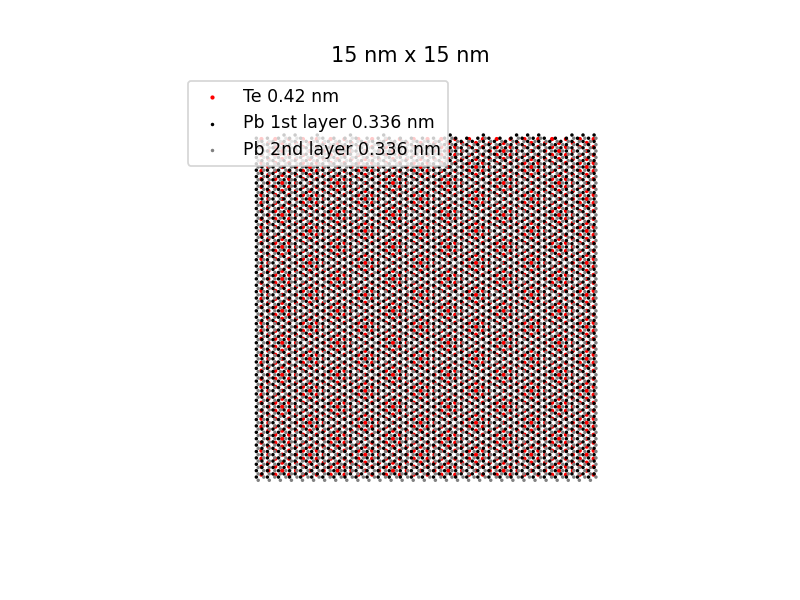

<ipython-input-20-63ae59fa74ad>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection="3d")


In [20]:
fig = plt.figure()
plt.gca().set_aspect('equal')
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z_masked,'.',s=2,color='red',label='Te 0.42 nm')
ax.scatter3D(ix,iy,iz_masked,'.',s=1,color='black',label='Pb 1st layer 0.336 nm')
ax.scatter3D(ix+iori2[0],iy+iori2[1],iz_masked,'.',s=1,color='grey',label='Pb 2nd layer 0.336 nm')
#ax.scatter3D(ix-iori2[0],iy-iori2[1],iz_masked,'.',s=5,color='green')
#ax.scatter3D(ix,iy,iz_masked,'.',s=2,color='blue')
plt.legend()
ax.view_init(90, 0)
plt.xlim(1,16)
plt.ylim(1,16)
plt.title('15 nm x 15 nm')
plt.axis('off')
plt.savefig('moire.png')